### College of Computing and Informatics, Drexel University
---

# Data Modeling

## Project Title: U.S. Domestic Flights Delay Prediction

## Author(s): Grace Pham, Jessica Jha, Heidi Tran, Khanh Tran

---

## 1. Introduction & Problem Definition
---

Millions of passengers fly everyday (except when a pandemic is taking place) and because flying is one of the fastest ways to travel, demand may get overwhelming, causing delays in departures and landings. Flight delays cause more than just inconvenience - it costs airlines and passegner money from rebooking flights, missing connecting flights, having to provide hotel and purchase food if the next flight is hours or days away. We hope to uncover certain trends from this data such as which airlines have the most delays, which destinations are most impacted, what are the causes of these delays, on average when are these delays happening the most, and build predictive classification models and compare which one can predict flight delays the best.

Using this data found from the U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics (BTS) helps give insight into different factors at play when flights are delayed. This project utilized Apache Spark for downsizing the data and multiple Python libraries for pre-processing, EDA, visualizations, and predictive modeling. The results will benefit passengers to help plan their next itineraries and prepare the best plan of action to make sure their flights to their destination are as delay-free as possible.

## 3. Data
---
#### Main Dataset

The dataset was retrieved from IBM. The original dataset is 7.2 GB in size. This dataset provides information on roughly 200 million U.S. domestic flights on United States Bureau of Transportation Statistics along with the flights’ information including flight date, place of origin, destination, delay time, flight time, etc.

https://developer.ibm.com/exchanges/data/all/airline/

#### Airport Codes for Airline names
The list of airport codes was found on the Bureau of Transportation Statistics on the U.S. Department of Transportation site which was then copied into a CSV file to use to iterate through the list and replace the codes with Airline names to make better sense of the data. 
https://www.bts.gov/topics/airlines-and-airports/airline-codes

#### Metadata
- Fligts dataset
    - Format: CSV
    - Number of records: 194 million
    - Data Coverage: United States 1987 - 2020
    
- Airlines name dataset
    - Format: CSV 
    - Number of records: 1652 records

#### Downsize the data

In order to downsize the data, a local cluster of sample code from the IBM notebook was run on Apache Spark, an open-source cloud clustering platform. A smaller subset of data was able to be extracted so that all of our group members were able to have access to the same data to split pre-processing tasks. 

#### Glossary


| Field Name | Type | Description |
| --- | --- | --- |
| Year | int64 | year of the flight |
| Month | int64 | month of the flight  |
| DayofMonth | int64 | day of the month  |
| FlightDate | datetime64[ns] | date of the flight |
| Reporting_Airline | object | unique airline carrier code|
| DOT_ID_Reporting_Airline | int64 | Number assigned by US DOT to identify a unique airline |
| IATA_CODE_Reporting_Airline | object | Airline Code assigned by IATA |
| Tail_Number | object | Aircraft tail number |
| Flight_Number_Reporting_Airline | int64 | Flight Number |
| OriginAirportID | int64 | Origin Airport ID |
| OriginAirportSeqID | int64 | Origin Airport Sequence ID |
| OriginCityMarketID | int64 | Origin City Market ID |
| Origin | object | Origin Airport Code|
| OriginCityName | object | Origin City Name |
| OriginState | object | Origin State | 
| OriginStateFips | int64 | Origin State FIPS place code | 
| DestAirportID | int64 | Destination Airport ID |
| DestAirportSeqID | int64 | Destination Airport Sequence ID |
| OriginWac | int64 | Origin Airport World Area Code |
| DestCityMarketID | int64 | Destination City Market ID |
| Dest | object | Destination Airport Code |
| DestCityName | object | Destination City Name | 
| DestState | object | Destination State | 
| DestStateFips | int64 | Destination State FIPS code |
| DestStateName | object | Destination State Name |
| DestWac | int64 | Destination Airport World Area Code |
| CRSDepTime | int64 | Computer Reservation System (scheduled) Departure Time |
| DepTime | float64 | Departure Time (hhmm) |
| DepDelay | float64 | Departure delay (minutes) |
| DepDelayMinutes | float64 | Absolute value of DepDelay |
| DepartureDelayGroups | float64 | Departure delay 15 minute interval group |
| DepTimeBlk | object | Computer Reservation System (scheduled) time block |
| TaxiOut | float64 | Taxi out time (minutes) |
| WheelsOff | float64 | Wheels off time (local time, hhmm) |
| WheelsOn | float64 | Wheels on time (local time hhmm) |
| TaxiIn | float64 | Taxi in time (minutes) |
| CRSArrTime | int64 | Computer Reservation System (scheduled)
Arrival Time |
| ArrTime | float64 | Arrival time (local time, hhmm) |
| ArrDelay | float64 | Arrival delay (minutes) |
| ArrDelayMinutes | float64 | Absolute value of ArrDelay |
| ArrDel15 | float64 | Arrival Delay >15? |
| ArrivalDelayGroups | float64 | Arrival delay 15 minute  interval group |
| ArrTimeBlk | object | Computer Reservation System (scheduled) arrival time block |
| Cancelled | float64 | 1 = canceled |
| Diverted | float64 | 1 = diverted |
| CRSElapsedTime | float64 | Computer Reservation System (scheduled) elapsed time |
| ActualElapsedTime | float64 | Actual elapsed time |
| AirTime | float64 | Flight time (minutes) |
| Distance | float64 | Distance between airports (miles) |
| DistanceGroup | int64 | 250 mile distance interval group |
| CarrierDelay | float64 | Carrier delay (minutes) |
| WeatherDelay | float64 | Weather delay (minutes) |
| NASDelay | float64 | National Air System delay (minutes) |
| SecurityDelay | float64 | Security delay (minutes) |
| LateAircraftDelay | float64 | Late aircraft delay (minutes) |
| DivAirportLandings | int64 | Number of diverted airport landings |                     

### Import packages

In [ ]:
import sys
import json
import pandas as pd
import numpy as np
import seaborn as sns

import sklearn

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB # BernoulliNB is designed for binary features
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# Evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import precision_recall_fscore_support

import matplotlib.pyplot as plt
#from google.colab import data_table

# Ignore warnings in Jupyter Notebook
import warnings
warnings.filterwarnings('ignore')

# Config seaborn
sns.set(rc={"figure.figsize":(12, 10)})
sns.set_style('darkgrid')
sns.set_palette('Set2')

#### Common utilities that we can re-use.
Some of thehese functions were given to us by IBM sample notebook. We also wrote some original functions to re-use throughout the notebook as well.

In [ ]:
from re import I
def reduce_mem_usage(df: pd.DataFrame) -> pd.DataFrame:
    """Iterate through all the columns of a dataframe and modify the data type to reduce memory usage.
        I doubt that we would use up what Colab gives us in the free tier, but still it's a helpful util.
    :param df: pandas DataFrame    
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df


def import_data(file: str, json=False) -> pd.DataFrame:
    """Create a dataframe and optimize its memory usage
    :param file: filepath.
    """
    if json:
        try:
            df = pd.read_json(file)
            df = reduce_mem_usage(df)
        except ValueError:
            df = pd.read_json(file, lines=True)
            df = reduce_mem_usage(df)
    elif not json:
        df = pd.read_csv(file, parse_dates=True, keep_date_col=True)
        df = reduce_mem_usage(df)
    return df

    
def index_file_checker(df, col_name):
    return df[df[col_name].isnull()].index.tolist()


def check_field(df, col_name):
    """Check null percentage of a column
    """
    ind_miss = index_file_checker(df=df, col_name=col_name)
    
    if ind_miss == []:
        print("No Null values of {x}".format(x = col_name))
        if len(df) == len(df[col_name].unique()):
            print("All records of {x} is populated for the \"M Field\" and are unique".format(x = col_name))
            
    else:
        pctMissing = 100*(len(ind_miss)/len(df))
        print(f"Percentage of missing {col_name} field: {pctMissing:.2f}%")


def check_duplicate_values(df: pd.DataFrame, col_name: str =None):
    '''Check for duplicate values in a given column in a given dataframe. If no column is given, only check for duplicate rows in the dataframe.
    '''
    try:
        if col_name is not None:
            dups = df.duplicated(subset=[col_name], keep='first')
            len_dups = len(dups[dups==True])
            percent_dups = 100*len_dups/len(df)

            if len_dups == 0:
                print(f"\nNo duplicate values in {col_name} field.")
            elif len_dups > 0:
                print(f"\nPercentage of duplicate values in {col_name} field: {percent_dups}")
                print(f"Percentage of unique values in {col_name} field: {100-percent_dups}")
        elif col_name is None:
            dups = df.duplicated(keep='first')
            len_dups = len(dups[dups==True])
            percent_dups = 100*len_dups/len(df)
            
            if len_dups == 0:
                print(f"\nNo duplicate rows in dataframe.")
            elif len_dups > 0:
                print(f"\nPercentage of duplicate rows in dataframe: {percent_dups}")
                print(f"\nPercentage of unique rows in dataframe: {100-percent_dups}")
    except Exception as e:
        print(e)


def calculate_bound_values(df, col_name):
  ''' Calculate lower and upper bound value for given column in the dataframe
  '''
  Q1 = df[col_name].quantile(0.25)
  Q3 = df[col_name].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  return (lower_bound, upper_bound)


def check_outliers(df: pd.DataFrame, col_name: str = None):
  '''Print out information about the lower boundary, upper boundary and percentage of outliers
  '''
  lower_bound, upper_bound = calculate_bound_values(df, col_name)
  
  outliers_lower = df[col_name][df[col_name] < lower_bound]
  outliers_upper = df[col_name][df[col_name] > upper_bound]
  outliers_cnt = len(outliers_lower) + len(outliers_upper)
  outliers_pct = (outliers_cnt * 100) / len(df[col_name])
  print(f"Column: {col_name}. Lower boundary: {lower_bound}. Upper boundary: {upper_bound}. Percentage of outliers: {outliers_pct:.2f}%")


def remove_outliers(df, col_name):
  '''Replace outliers at given column with null values
  '''
  lower_bound, upper_bound = calculate_bound_values(df, col_name)
  df[col_name] = df[col_name][(df[col_name] < upper_bound) & (df[col_name] > lower_bound)]
  

def get_numeric_cols(df: pd.DataFrame):
  '''Return the names of all the numeric columns in a Data Frame
  '''
  return list(df.select_dtypes(include=[np.number]).columns.values)


def drop_col(df: pd.DataFrame, col_name: str = None) -> pd.DataFrame:
  '''Drop a column in a Data Frame and return the new Data Frame
  '''
  return df.drop(col_name, axis='columns')


def drop_cols_with_missing_val_threshold(df, threshold): 
  '''Drop columns which has percentage of missing value surpassed the input threshold
  Return a new dataframe in which unqualified columns has been dropped
  '''
  threshold_percentage = len(df) * threshold
  return df.dropna(thresh=threshold_percentage, axis=1)


def display_bar_char(xName: str, yName: str, df: pd.DataFrame, orient: str, figSize: (int, int), title: str):
    fig = plt.figure(figsize=figSize)
    ax = plt.axes()
    sns.barplot(x = xName, y = yName, data = df, orient = orient, ax = ax).set(title = title)


def plot_confusion_matrix(data, labels):
    sns.set(color_codes=True)
    plt.figure(1, figsize=(9, 6))
    plt.title("Confusion Matrix")
    sns.set(font_scale=1.4)
    ax = sns.heatmap(data, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Scale'})
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    ax.set(ylabel="True Label", xlabel="Predicted Label")
    plt.show()

# 4. Modeling
---
## 4.1 Feature selection

In [ ]:
features = ["Year",
"Month",
"Day",
"Airline",
"OriginAirport",
"OriginCityName",
"OriginState",
"DestAirport",
"DestState",
"DestCityName",
"TaxiIn",
"TaxiOut", 
"WheelsOff",
"WheelsOn"]

## 4.2 Encode categorical variables

In [ ]:
cat_cols = ["Airline", 
            "OriginState", "DestState",
            "OriginAirport", "DestAirport", 
            "OriginCityName", "DestCityName"]

#### Encode `OriginCityName` and `DestCityName` with the same encoder

In [ ]:
# Encode values as integer
encoding = LabelEncoder()
encoding.fit(airline_df["OriginCityName"].values)

# Transform OriginCityName and DestCityName
encodedOriginCity = encoding.transform(airline_df["OriginCityName"].values)
encodedDestCity = encoding.transform(airline_df["DestCityName"].values)

newColumns = np.vstack([encodedOriginCity, encodedDestCity]).T
onehot = OneHotEncoder()
encodedCityNameCols = onehot.fit_transform(newColumns).todense()

encodedCityNameCols

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

#### Encode `OriginState` and `DestState` with the same encoder

In [ ]:
# Encode values as integer
encoding1 = LabelEncoder()
encoding1.fit(airline_df["OriginState"].values)

# Transform OriginState and DestState
encodedOriginState = encoding1.transform(airline_df["OriginState"].values)
encodedDestState = encoding1.transform(airline_df["DestState"].values)

newColumns1 = np.vstack([encodedOriginState, encodedDestState]).T
onehot1 = OneHotEncoder()
encoded_Origin_Dest_Cols = onehot1.fit_transform(newColumns1).todense()

encoded_Origin_Dest_Cols

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

#### Encode `OriginAirport` and `DestAirport` with the same encoder

In [ ]:
#not all airports were listed in both Origin and Dest, so had to combine them to fit into the encoder 
OriginAirport = []
DestAirport = []
for i in airline_df["OriginAirport"].values:
    OriginAirport.append(i)
    
for x in airline_df["DestAirport"].values:
    DestAirport.append(x)

In [ ]:
combined = OriginAirport + DestAirport

In [ ]:
combined_df = pd.DataFrame(combined, columns=['AllAirports'])

In [ ]:
# Encode values as integer
encoding2 = LabelEncoder()
encoding2.fit(combined_df["AllAirports"].values)

# Transform combined airports list 
encodedOriginAirport = encoding2.transform(airline_df["OriginAirport"].values)
encodedDestAirport = encoding2.transform(airline_df["DestAirport"].values)

newColumns2 = np.vstack([encodedOriginAirport, encodedDestAirport]).T
onehot2 = OneHotEncoder()
encodedAirportsCols = onehot2.fit_transform(newColumns2).todense()

encodedAirportsCols

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

#### Encode `Airline`

In [ ]:
# Encode values as integer
encoding3 = LabelEncoder()
encoding3.fit(airline_df["Airline"].values)

# Transform Airlines
encodedAirlines = encoding3.transform(airline_df["Airline"].values)

newColumns3 = np.vstack([encodedAirlines]).T
onehot3 = OneHotEncoder()
encodedAirlinesCols = onehot3.fit_transform(newColumns3).todense()

encodedAirlinesCols

matrix([[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

## 4.3 Construct the new dataframe for modeling

In [ ]:
numeric_cols = list(set(features).difference(set(cat_cols)))
otherCols = airline_df[numeric_cols].values
airline_encoded_df = np.hstack([otherCols, 
                                encodedCityNameCols,
                                encoded_Origin_Dest_Cols,
                                encodedAirportsCols,
                                encodedAirlinesCols]) 

In [ ]:
airline_encoded_df

matrix([[   6., 2350.,   25., ...,    0.,    0.,    0.],
        [   4.,  940., 1119., ...,    0.,    0.,    0.],
        [   5., 2024., 2140., ...,    0.,    0.,    0.],
        ...,
        [   9., 1301., 1446., ...,    0.,    0.,    0.],
        [   6., 1050., 1059., ...,    0.,    0.,    0.],
        [   4., 1031., 1134., ...,    0.,    0.,    0.]])

---
## 4.4 Regression Analysis

### Split the dataset into training and testing

In [ ]:
X = airline_encoded_df
y = airline_df[['DepDelayMinutes']].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=45)

### 4.4.1 Linear Regression Model

Regression analysis defines the relationship between a dependent variable (y), in this case delayed departure minutes, and any number of independent variables (X), our categorical and numerical features that were encoded above.

In [ ]:
# Train
linearRegModel = LinearRegression()
linearRegModel.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Predict
y_pred = linearRegModel.predict(X_test)

In [ ]:
# Evaluate
print("Coefficients: \n", linearRegModel.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficients: 
 [[ 1.38049190e-01  1.71920446e-02 -8.12898361e-03 ... -3.85704814e+07
  -3.85704799e+07 -3.85704865e+07]]
Mean squared error: 1637.96
Coefficient of determination: 1.00


In [ ]:
LinReg_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
LinReg_RMSE

40.47175048071038

➤ The calculated RMSE score shows that the average distance between the observed data values and the predicted data values is large (around 40.9)

➤ With an R-squared score of 1.00, the model is indicated to be a perfect model where the fitting line fits perfectly with the data points. First of all, we highly doubt that the relationship between the delay minutes of the flights and the decision variables can be perfectly described in a function. Secondly, a positive MSE contradicts the R-squared score of 1.0 which should be equivalent to a MSE of 0. Apparently, the result is highly questionable and does not add up. This observation can be due to the number of decision variables exploding to thousands in size after being one-hot encoded.

➤ Plotting is not possible due to the difference between the shape of the independent variables (which should appear on the x-axis )and dependent variable (which should appear on the y-axis). Plotting should be a part of model evaluation since it gives us a better idea of the condition of the models (underfitted, overfitted, balanced), so the lack of visualization is considered a big downsize of this approach.

➤ This is not an ideal approach.

### 4.4.2 Decision Trees

We will be using DecisionTreeRegressor for a regression problem. It is important to distinguish between DecisionTreeClassifier and DecisionTreeRegressor so that we can pick the suitable class for the nature of the problem that we are trying to solve. We will also experiment with two different max depths of the tree, 2 and 5. Our expectation should be with a higher max depth, the model will be more responsive with the fine details and learn more from the noise.

In [ ]:
# Fit regression model
dtModel2 = DecisionTreeRegressor(max_depth=2)
dtModel5 = DecisionTreeRegressor(max_depth=5)
dtModel2.fit(X_train, y_train)
dtModel5.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

Here, we will be comparing the performances of the two trees with max_depth = 2 and 5 respectively.

In [ ]:
# Predict
y_pred = dtModel2.predict(X_test)
y_pred = dtModel5.predict(X_test)

In [ ]:
# Evaluate
print("For decision tree with Max depth = 2")
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred)) # The mean squared error
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred)) # The coefficient of determination: 1 is perfect prediction
print()
print("For decision tree with Max depth = 5")
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred)) # The mean squared error
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred)) # The coefficient of determination: 1 is perfect prediction

For decision tree with Max depth = 2
Mean squared error: 1578.20
Coefficient of determination: 1.00

For decision tree with Max depth = 5
Mean squared error: 1578.20
Coefficient of determination: 1.00


We received high MSE for for both max depth being 2 and being 5

➤ High MSE indicates that the accuracy of prediction using this model is not high as there would be few matches between actual data and predicted data

Again, we witness the same issue with the MSE-R-squared-score pair as the one in the linear regression analysis above.

➤ This is not an ideal approach.

Regression shows to be not the suitable approach for this problem. With the majority of the attributes being categorical, it is more reasonable to go for classification models. 

---
## 4.5 Classification

In [ ]:
# Download package for oversampling
# conda install -c conda-forge imbalanced-learn

### Looking at the number of labels 

In [ ]:
pd.cut(airline_df.DepDelayMinutes
, bins = [0, 15, 1000]
, labels =['0 to 15' ,'15 to 1000']
, right=False).value_counts()

0 to 15       308237
15 to 1000     70663
Name: DepDelayMinutes, dtype: int64

This means that we have 22% of label 0 and 78% of label 1.

### Creating binary labels

In [ ]:
airline_df['Delay > 15 mins?'] = airline_df['DepDelayMinutes'].apply(lambda x : 1 if x > 15 else 0)
airline_df['Delay > 15 mins?'].head()

0    1
1    0
2    1
3    1
4    1
Name: Delay > 15 mins?, dtype: int64

### Splitting the dataset

In [ ]:
X = airline_encoded_df
y = airline_df[['Delay > 15 mins?']].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.2, random_state=42)

### 4.5.1 Decision Tree

In [ ]:
decision_tree = DecisionTreeClassifier(random_state=42)

# Train
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Predict
Y_pred = decision_tree.predict(X_test)
Y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [ ]:
# Evaluate
print(classification_report(y_test, Y_pred))
print(confusion_matrix(y_test, Y_pred))

# Accuracy score
print(f'Accuracy is: {accuracy_score(Y_pred,y_test)}')

# Calculate precision, recall, f1-measure, and support
precision_recall_fscore_support(y_test, Y_pred, average = 'weighted')

              precision    recall  f1-score   support

           0       0.85      0.86      0.86     62137
           1       0.33      0.32      0.33     13655

    accuracy                           0.76     75792
   macro avg       0.59      0.59      0.59     75792
weighted avg       0.76      0.76      0.76     75792

[[53348  8789]
 [ 9291  4364]]
Accuracy is: 0.7614523960312434


(0.7580089851291408, 0.7614523960312434, 0.7596987677196796, None)

&rightarrow; F-1 score for the postitive label is 33% which is very low

&rightarrow; Reason: Highly skewed data (more flights with shorter delay time than flights with long delay time)

&rightarrow; Our approach: Use oversampling with SMOTE

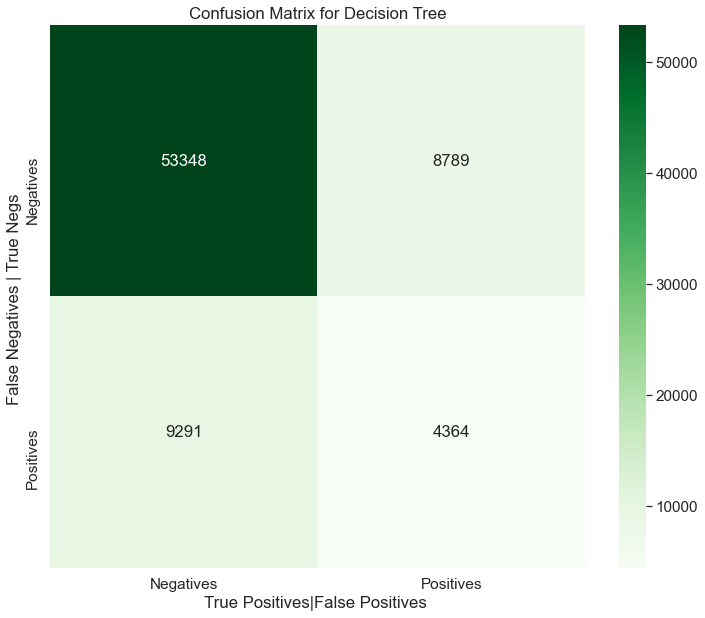

In [ ]:
mat_dt = confusion_matrix(y_test, Y_pred)
ax = plt.subplot()
sns.heatmap(mat_dt, annot=True, fmt='g', ax=ax, cmap=plt.cm.Greens); 

# labels, title and ticks
ax.set_title('Confusion Matrix for Decision Tree'); 
ax.xaxis.set_ticklabels(['Negatives', 'Positives']); ax.yaxis.set_ticklabels(['Negatives', 'Positives']);

*  High occurence of False Negative in prediction: Lots of flights with ***less than 15 minutues delay*** were classified as having ***more than 15 minutes delay***, possibly due to the imbalance of the dataset

### 4.5.2 Decision Tree with Oversampling
Create synthesized data from the minority class so we would have equal number of negative and postitive labels &rightarrow; Dataset becomes more balanced
#### Over sampling

In [ ]:
unique, frequency = np.unique(y_train,
                              return_counts = True) 
count = np.asarray((unique, frequency ))

print("Before oversampling:")
print("The counts of negative and positive labels are:\n",
     count)

Before oversampling:
The counts of negative and positive labels are:
 [[     0      1]
 [248545  54620]]


In [ ]:
smote = SMOTE(random_state = 42)
X_train_syn, y_train_syn = smote.fit_resample(X_train, y_train)

In [ ]:
unique, frequency = np.unique(y_train_syn,
                              return_counts = True) 
count = np.asarray((unique, frequency ))
  
print("After oversampling:")    
print("The counts of negative and positive labels are:\n",
     count)

After oversampling:
The counts of negative and positive labels are:
 [[     0      1]
 [248545 248545]]


#### Decision Tree (with oversampling)

In [ ]:
dt_oversampling = DecisionTreeClassifier(random_state=42)

# Train
dt_oversampling.fit(X_train_syn, y_train_syn)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Predict
Y_pred = dt_oversampling.predict(X_test)
Y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
# TODO: run this block to get the F1 scores (currently just have accuracy score)

# Evaluate
print(classification_report(y_test, Y_pred))
print(confusion_matrix(y_test, Y_pred))

# Accuracy score
print(f'Accuracy is: {accuracy_score(Y_pred,y_test)}')

# Calculate precision, recall, f1-measure, and support
scores = precision_recall_fscore_support(y_test, Y_pred, average = 'weighted')
print(f"Precision score: {scores[0]}")
print(f"Recall score: {scores[1]}")
print(f"F1 score: {scores[2]}")

              precision    recall  f1-score   support

           0       0.85      0.86      0.86     62137
           1       0.35      0.34      0.34     13655

    accuracy                           0.77     75792
   macro avg       0.60      0.60      0.60     75792
weighted avg       0.76      0.77      0.76     75792

[[53460  8677]
 [ 9071  4584]]
Accuracy is: 0.7658328055731476


(0.763185445675648, 0.7658328055731476, 0.7644889505509619, None)

&rightarrow; After oversampling, f1-score for positive label has increased to around 34%, which is **not** a considerable increase from f1 score before oversampling which is 33%

&rightarrow; This model's still not doing well after oversampling approach

### 4.5.3 Random Forest with oversampling

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100) # 100 trees in the forest

# Train
random_forest.fit(X_train_syn, y_train_syn)

RandomForestClassifier()

In [ ]:
# Predict
Y_pred = random_forest.predict(X_test)

In [ ]:
# Evaluate
print(classification_report(y_test, Y_pred))
print(confusion_matrix(y_test, Y_pred))

# Accuracy score
print(f'Accuracy is: {accuracy_score(Y_pred,y_test)}')

# Calculate precision, recall, f1-measure, and support
scores = precision_recall_fscore_support(y_test, Y_pred, average = 'weighted')
print(f"Precision score: {scores[0]}")
print(f"Recall score: {scores[1]}")
print(f"F1 score: {scores[2]}")

              precision    recall  f1-score   support

           0       0.84      0.98      0.90     62137
           1       0.60      0.13      0.22     13655

    accuracy                           0.83     75792
   macro avg       0.72      0.56      0.56     75792
weighted avg       0.79      0.83      0.78     75792

[[60926  1211]
 [11829  1826]]
Accuracy is: 0.8279501794384632
Precision score: 0.7948653138693962
Recall score: 0.8279501794384632
F1 score: 0.7800000420353179


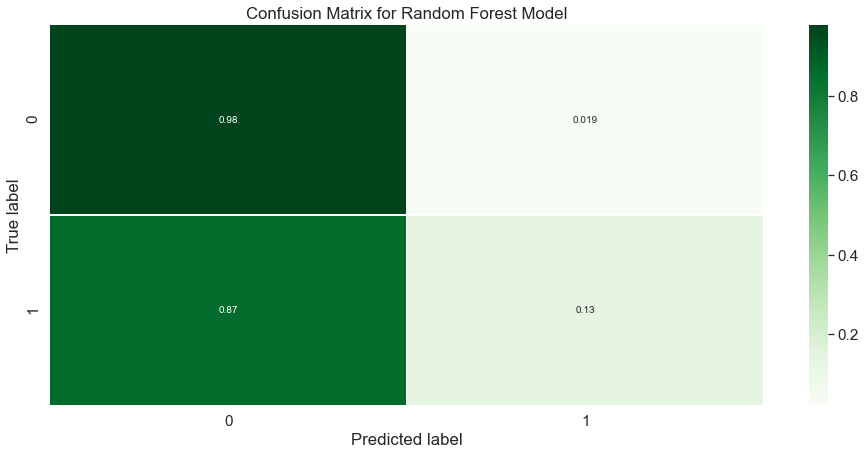

In [ ]:
# Get and reshape confusion matrix data
RF_matrix = confusion_matrix(y_test, Y_pred)
RF_matrix = RF_matrix.astype('float') / RF_matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(RF_matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

- Decent accuracy score: 82.8%
- F-1 score for the positive label is around 22% 
- F-1 score for the negative label is around 90% 
- Decent Weighted F-1 score: 78%

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# n_neighbors's default value = 5
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred_k = knn.predict(X_test)

C:\Users\jcj67\Anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\jcj67\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\jcj67\Anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [ ]:
# Predictions result
print(classification_report(y_test, Y_pred_k))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88     62096
           1       0.34      0.19      0.24     13696

    accuracy                           0.79     75792
   macro avg       0.59      0.55      0.56     75792
weighted avg       0.75      0.79      0.76     75792



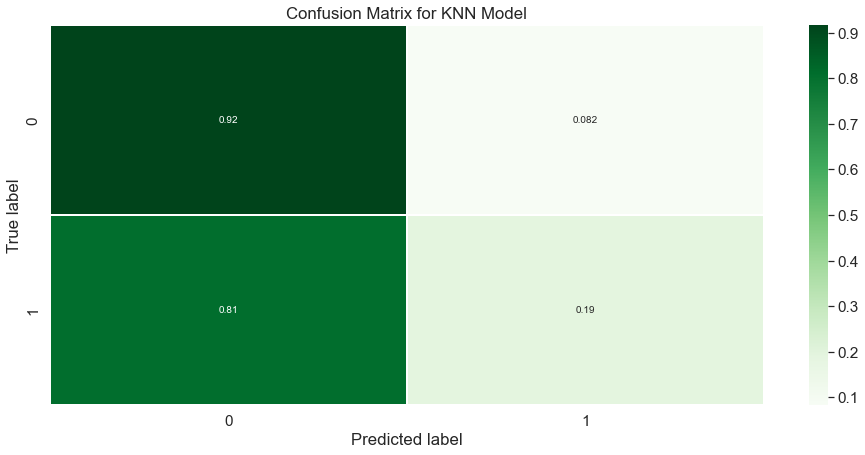

In [ ]:
mat = confusion_matrix(y_test, Y_pred_k)
mat = mat.astype('float') / mat.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(mat, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for KNN Model')
plt.show()

### 4.5.4 Cross-Validation Scores 

In [ ]:
import warnings
warnings.filterwarnings('ignore')


knn_score = cross_val_score(knn, X_test, y_test, scoring = 'f1')
print("Cross-val score for KNN: {0:.1f}%".format(np.mean(knn_score) * 100))

rf_score = cross_val_score(random_forest, X, y, scoring = 'f1')
print("Cross-val score for Random Forest: {0:.1f}%".format(np.mean(rf_score) * 100))

dt_score = cross_val_score(dt_oversampling, X, y, scoring = 'f1')
print("Cross-val score for Decisision Tree: {0:.1f}%".format(np.mean(dt_score) * 100))

Cross-val score for KNN: 23.3%
Cross-val score for Random Forest: 15.7%
Cross-Val Score for Decision Tree: 29.8%
